In [1]:
# read csv file
import csv
import sys
from matplotlib.colors import Normalize
import numpy as np
import matplotlib.pyplot as plt


In [27]:
# read csv file in 'Re_ defibrillation codes\maskcirclenew1.csv', no def
data = []
with open('../Re_ defibrillation codes/maskcirclenew1.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader: # get rid of first two rows
        for i in row:
            data.append(int(i))

        data = data[2:]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..512].


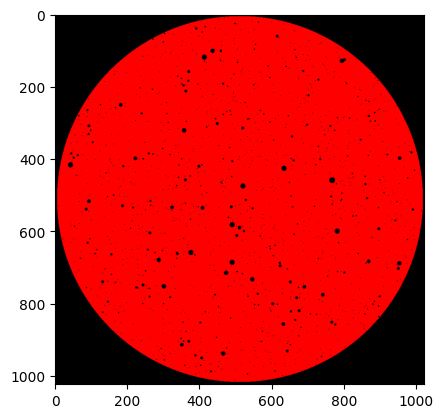

In [28]:
# data is length 1024*1024*4, visulize it in 1024*1024 map with rgba as order, with rgba, now if r = 0, put it blue, if r = 1, make it red
# dont modify data itself!!!!!!!

data_ = np.array(data).reshape((1024, 1024, 4))
plt.imshow(data_[..., :3] * 512)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..512].


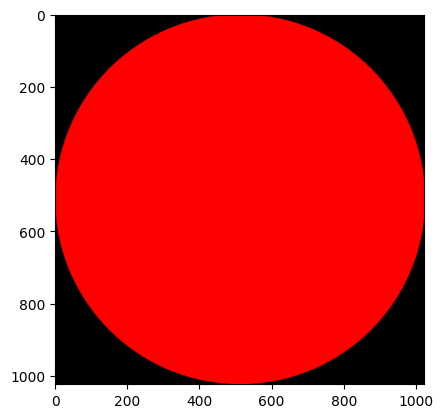

In [87]:
# now we modify pixels within circle all r channel from 0 to 1
for i in range(data_.shape[0]):
    for j in range(data_.shape[1]):
        if (i - 512) ** 2 + (j - 512) ** 2 <= (1024/2) ** 2:  # circle with radius 500
            data_[i, j] = [1, 0, 0, 0]  # red
plt.imshow(data_[..., :3] * 512)
plt.show()


In [88]:
# now save the data_ into same format csv file with first two values as 1024, 1024
# write into '../Re_ defibrillation codes/maskcircle.csv'
data_list = data_.flatten().tolist()
data_list = [1024, 1024] + data_list
with open('../Re_ defibrillation codes/maskcircle.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(data_list)

In [ ]:
# read csv file in 'Re_ defibrillation codes\maskcirclenew1.csv', no def
csv.field_size_limit(sys.maxsize)

data = []
with open('../data/tip_test.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader: # get rid of first two rows
        for i in row:
            data.append(int(i))
data_ = np.array(data).reshape((1024, 1024, 4))

# now change all pixel [1,1,1,1] to [1 0 0 0] at circle with radius 512

epsilon = 1e-6
for i in range(data_.shape[0]):
    for j in range(data_.shape[1]):
        if (512) ** 2 - epsilon <= (i - 512) ** 2 + (j - 512) ** 2 <= (512) ** 2 + epsilon:  # circle with radius 500
            if (data_[i, j] == [1, 1, 1, 1]).all():
                data_[i, j] = [1, 0, 0, 0]  # red



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..512].


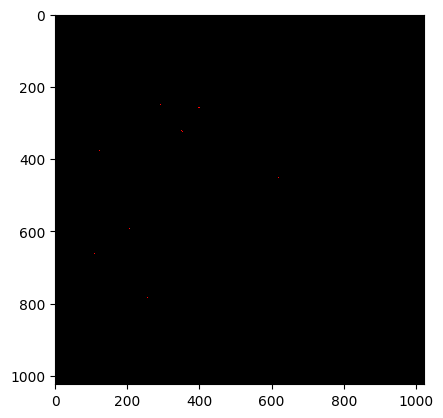

In [63]:
# all pixel are [0000] or [1111], now scale [0000 to white] and [1111 to black]

data__ = data_[..., :3] * 512
plt.imshow(data__, interpolation='nearest')
plt.show()

In [52]:
# find all 1 idx in data
idxs = np.where(data_[..., 0] == 1)

In [53]:
idxs

(array([241, 246, 246, 250, 258, 258, 265, 271, 271, 273, 273, 274, 290,
        322, 325, 343, 345, 377, 379, 388, 393, 393, 394, 396, 401, 433,
        452, 453, 496, 504, 523, 526, 528, 531, 534, 574, 586, 590, 593,
        593, 607, 611, 613, 614, 619, 622, 623, 625, 632, 633, 651, 656,
        658, 661, 662, 717, 719, 734, 736, 743, 778, 783, 784, 800, 800,
        824, 853, 855, 904, 905, 905, 907, 909, 915]),
 array([257, 307, 309, 291, 397, 399, 444, 238, 422, 219, 236, 218, 446,
        350, 352, 487, 488, 123, 122, 257, 495, 496, 492, 217, 109, 630,
        618, 618,  68, 654, 182, 184, 182, 182, 659,  43,  44, 207, 205,
        206, 846, 849, 728, 852, 739,  21, 841, 840, 752, 753, 825, 152,
        148, 155, 109, 153, 152, 133, 133, 126, 260, 258, 256, 240, 296,
        173, 351, 399, 353, 342, 353, 366, 351, 345]))

In [58]:
data__ = data_[..., :3] * 512
data__[241,257]

array([512, 512, 512])

In [54]:
data_[241,257]

array([1, 1, 1, 1])